In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [2]:
import pandas as pd

# Suppose we have a large dataset with float columns
df_pakjobs = pd.DataFrame({
    'Job_ID': [1.0, 2.0, 3.0, None, 5.0],
    'Salary': [50000.0, 60000.0, 55000.0, 45000.0, 70000.0],
})

# Convert specific float columns to integer
df_pakjobs['Job_ID'] = df_pakjobs['Job_ID'].fillna(0).astype(int)
df_pakjobs['Salary'] = df_pakjobs['Salary'].astype(int)

print(df_pakjobs)

   Job_ID  Salary
0       1   50000
1       2   60000
2       3   55000
3       0   45000
4       5   70000


In [3]:

df_pakjobs=pd.read_csv("https://opendata.com.pk/dataset/fc9ce402-be70-4640-872d-069b6e05c342/resource/af0aaf77-1889-43e9-aed6-4cef1165b7d4/download/pakistan-available-job-dec-19-mar-21.csv")

In [4]:

df_pakjobs

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21
...,...,...,...,...,...,...,...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,NaN,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20
6676,Full Time Commercial Experience Executive Job ...,NaN,NaN,Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20
6677,Full Time Business Development Executive Job i...,NaN,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,NaN,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20


In [5]:
# First, convert the 'Date Posted' column to datetime format
df_pakjobs['Date Posted'] = pd.to_datetime(df_pakjobs['Date Posted'], errors='coerce')

# Now you can use the .dt accessor to extract the month
df_pakjobs['job_posted_month'] = df_pakjobs['Date Posted'].dt.month



# Display the updated DataFrame
df_pakjobs.head()

C:\Users\bijar\AppData\Local\Temp\ipykernel_2412\4276856648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pakjobs['Date Posted'] = pd.to_datetime(df_pakjobs['Date Posted'], errors='coerce')


,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted,job_posted_month
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,2021-03-12,3
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,2021-03-12,3
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,2021-03-12,3
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,2021-03-09,3
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,2021-03-05,3


In [6]:
df_pakjobs['job_posted_month']=df_pakjobs['Date Posted'].dt.strftime('%B')



In [7]:
df_pakjobs.head(5)

def simplify_job_name(name):
    # Custom rule to remove common words
    words_to_remove = ['Senior', 'Manager', 'Assistant', 'Officer','Full Time','Job in Pakistan','Full Time Territory',"New Job Positions","Jobs in Pakistan"]
    for word in words_to_remove:
        name = name.replace(word, '')
    return name.strip()

# Apply the custom function
df_pakjobs['short_job_name'] = df_pakjobs['Job Name'].apply(simplify_job_name)

# Display the updated DataFrame
df_pakjobs[['Job Name', 'short_job_name']].head()


,Job Name,short_job_name
0,"Full Time New Job Positions .Net, .Netcore, Fl...",".Net, .Netcore, Flutter, Tea Boy"
1,Full Time Senior Web Developer Jobs in Pakistan,Web Developer
2,Full Time Russian Speakers Jobs in Pakistan,Russian Speakers
3,Full Time Customer Support Specialist - Intern...,Customer Support Specialist - International
4,Full Time English Speaker - International Busi...,English Speaker - International Business Devel...


In [8]:
df_pakjobs_pivot=df_pakjobs.pivot_table(index='job_posted_month', columns="short_job_name", aggfunc='size')

In [9]:
df_pakjobs_pivot

short_job_name,,", B2B Products & Solutions",", International Student Recruitment (Pakistan)",- Corporate And Institutional Sales,- Corporate Sales,- Customer Analytics And Value Management,- Human Resource - AGTL - Karachi - Pakistan,- Industrial Relation / Security Admin,- Procurement - AGTL - Pakistan,. NET Web Developer,...,Wordpress/PHP Intern,Wordpress/Php Developers,Wordpress/Shopify Developer,Xamarin Developer,Xamarin Form Developer,Youtube Host,Youtube Video Caster,Youtube Vlog Host,Zonal s,iOS Engineer - Pakistan
job_posted_month,,,,,,,,,,,,,,,,,,,,,
April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
August,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
December,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
January,5.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_pakjobs_pivot=df_pakjobs_pivot.reset_index()

df_pakjobs_pivot['month_no']=pd.to_datetime(df_pakjobs_pivot['job_posted_month'],format='%B').dt.month

df_pakjobs_pivot=df_pakjobs_pivot.sort_values('month_no')

df_pakjobs_pivot=df_pakjobs_pivot.set_index('job_posted_month')
df_pakjobs_pivot=df_pakjobs_pivot.drop(columns='month_no')

In [11]:

df_pakjobs_pivot

short_job_name,,", B2B Products & Solutions",", International Student Recruitment (Pakistan)",- Corporate And Institutional Sales,- Corporate Sales,- Customer Analytics And Value Management,- Human Resource - AGTL - Karachi - Pakistan,- Industrial Relation / Security Admin,- Procurement - AGTL - Pakistan,. NET Web Developer,...,Wordpress/PHP Intern,Wordpress/Php Developers,Wordpress/Shopify Developer,Xamarin Developer,Xamarin Form Developer,Youtube Host,Youtube Video Caster,Youtube Vlog Host,Zonal s,iOS Engineer - Pakistan
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,5.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
June,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [12]:
top_5=df_pakjobs['short_job_name'].value_counts().head(5)
top_5 =top_5.index.tolist()
df_top5=df_pakjobs_pivot[top_5]

In [13]:
df_pakistan=df[df['job_country']=='Pakistan'].copy()
df_pakistan['job_posted_month']=df_pakistan['job_posted_date'].dt.strftime('%B')

df_pakistan_pivot=df_pakistan.pivot_table(index='job_posted_month', columns="job_title_short", aggfunc='size')
df_pakistan_pivot=df_pakistan_pivot.reset_index()
df_pakistan_pivot['month_no']=pd.to_datetime(df_pakistan_pivot['job_posted_month'],format='%B').dt.month

df_pakistan_pivot=df_pakistan_pivot.sort_values('month_no')

df_pakistan_pivot=df_pakistan_pivot.set_index('job_posted_month')

df_pakistan_pivot=df_pakistan_pivot.drop(columns='month_no')

df_pakistan_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,12,5,39,89,65,14,6,16,14,35
February,10,5,19,45,28,9,3,17,11,28
March,13,2,26,65,33,14,5,13,15,21
April,7,2,22,39,15,6,1,13,8,7
May,3,1,12,47,22,19,1,10,4,6
June,10,5,15,46,33,12,2,7,2,12
July,6,3,18,50,23,22,1,15,7,26
August,7,5,21,44,16,11,1,7,13,32
September,9,4,27,47,29,26,3,14,8,27


In [14]:
df_pakistan_merged=df_pakistan_pivot.merge(df_top5, on="job_posted_month")

In [15]:
result=(
    df_pakistan_merged
    .sum()
    .sort_values(ascending=False)
    .astype(int)
    .head()
    .index # Get the index of top 5
    .tolist()
    
    )


result

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Software Engineer',
 'Machine Learning Engineer']

<Axes: xlabel='job_posted_month'>

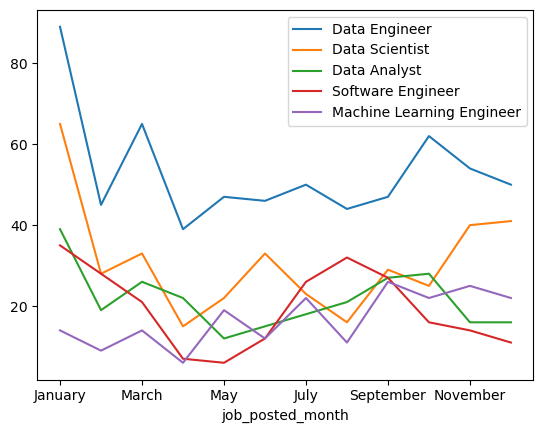

In [16]:
df_pakistan_merged[result].plot(kind='line')

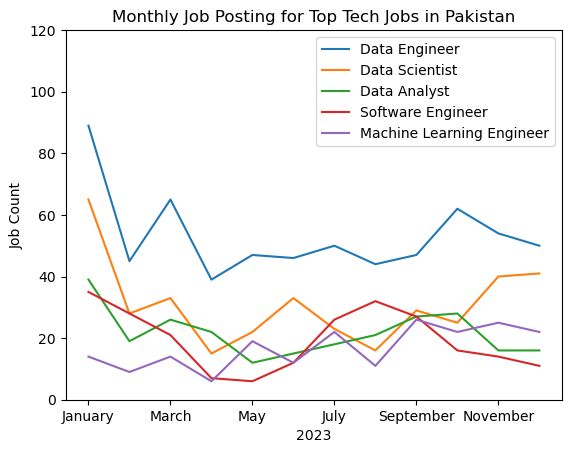

In [22]:
df_pakistan_merged[result].plot(kind="line")
plt.title("Monthly Job Posting for Top Tech Jobs in Pakistan")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(0,120)
plt.legend()
plt.show()